# KMeans- Exercícios

<font color=blue><b> Data Science do Zero</b></font><br>
 www.minerandodados.com.br  

1) Importe as bibliotecas para visualização de dados e clustering.

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

2) Leia a base de dados **iris.csv** localizada no diretorio **datasets** e crie um Dataframe.

In [149]:
iris = pd.read_csv(r"C:\Users\marcf\OneDrive\Documentos\Ciencia de dados\K-Means-Clustering\iris.csv")

In [150]:
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [151]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SepalLength  150 non-null    float64
 1   SepalWidth   150 non-null    float64
 2   PetalLength  150 non-null    float64
 3   PetalWidth   150 non-null    float64
 4   Species      150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


3) Armazene apenas as **features e seus dados** na variável train.

In [152]:
type(iris)

pandas.core.frame.DataFrame

In [31]:
from sklearn import datasets
iris2 = datasets.load_iris()

In [153]:
type(iris2)

sklearn.utils.Bunch

In [154]:
iris2.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

5) Armazene os dados de classes na variável classes.

In [156]:
classes = iris.drop('Species', axis=1)

6) Utilizando o código abaixo, crie uma função que faça o **calculo da distância euclidiana entre dois vetores**.

In [14]:
# Função que retorna a distância eucludiana de dois vetores de duas dimensões.
from sklearn.neighbors import DistanceMetric
def calcula_distancia(x,c):
    dist = DistanceMetric.get_metric('euclidean')
    return dist.pairwise(x,c)

7) Utilizando a função **calcula_distancia** faça:

- Calcule a distância entre os vetores **v1 e v2** abaixo
> v1 = [[1.2,1,2.1,1]]<br>
> v2 = [[1,1.9,5.4,3.2]]

In [17]:
v1 = [[1.2,1,2.1,1]]
v2 = [[1,1.9,5.4,3.2]]
calcula_distancia(v1,v2)

array([[4.07185461]])

- Calcule a distância entre os vetores **v3 e v4** abaixo e explique o retorno
> v3 = [[0.5,0,2.1,1.5]]<br>
> v4 = [[0.5,0,2.1,1.5]]

In [18]:
v3 = [[0.5,0,2.1,1.5]]
v4 = [[0.5,0,2.1,1.5]]
calcula_distancia(v3,v4)

array([[0.]])

8) Instâncie o algoritmo Kmeans com o número de clusters **igual ao número de classes** da sua base de dados e execute o algoritmo KMeans.

In [110]:
kmeans = KMeans(n_clusters=3)

09) Imprima os valores dos **centroides**.

In [162]:
kmeans.fit(classes)
centros = kmeans.cluster_centers_
centros

array([[6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.418     , 1.464     , 0.244     ]])

10) Selecione **três amostras da base de dados e calcule a distância euclidiana entre as amostras de dados e cada um dos valores de centroids**.

- DICA: Use um laço for...

In [64]:
iris.shape

(150, 5)

In [88]:
workediris = iris
X = workediris.drop('Species',axis=1)
X[:10]

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [163]:
from random import randint

for i in range(1,4):
    num = randint(1,150)
    print("Para a linha número ", num," a distância para os centros é de: ", calcula_distancia(classes[(num-1):num],centros))
    print("\n")

Para a linha número  138  a distância para os centros é de:  [[0.57903109 1.31541133 4.55574275]]


Para a linha número  54  a distância para os centros é de:  [[2.45978458 0.73153652 3.00672446]]


Para a linha número  99  a distância para os centros é de:  [[3.44291999 1.66064034 1.98584793]]




11) Gere a **tabela de distância** e verifique os valores através do método fit_transform().

In [134]:
X = iris.drop('Species',axis=1)
X[:10]

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [135]:
distance = kmeans.fit_transform(X)
distance

array([[0.14694217, 5.0595416 , 3.41925061],
       [0.43816892, 5.11494335, 3.39857426],
       [0.41230086, 5.27935534, 3.56935666],
       [0.51883716, 5.15358977, 3.42240962],
       [0.19796969, 5.10433388, 3.46726403],
       [0.68380699, 4.68148797, 3.14673162],
       [0.41520116, 5.21147652, 3.51650264],
       [0.0599333 , 5.00252706, 3.33654987],
       [0.80099438, 5.32798107, 3.57233779],
       [0.36659514, 5.06790865, 3.3583767 ],
       [0.48784424, 4.89806763, 3.32449131],
       [0.25138019, 4.9966845 , 3.31126872],
       [0.49192682, 5.19103612, 3.46661272],
       [0.90906105, 5.65173594, 3.90578362],
       [1.02019214, 5.10804455, 3.646649  ],
       [1.21309192, 4.88564095, 3.49427881],
       [0.66241377, 5.03090587, 3.495248  ],
       [0.1509702 , 5.02342022, 3.38444981],
       [0.82848778, 4.61792995, 3.11245944],
       [0.39898872, 4.97213426, 3.37738931],
       [0.46172719, 4.6955761 , 3.07471224],
       [0.33762701, 4.9236821 , 3.31506588],
       [0.

12) Utilizando o método **predict()** defina novos valores de dados e faça a predição.

In [164]:
import seaborn as sns

In [ ]:
iris = pd.read_csv(r"C:\Users\marcf\OneDrive\Documentos\Ciencia de dados\K-Means-Clustering\iris.csv")

<AxesSubplot:xlabel='SepalLength', ylabel='Density'>

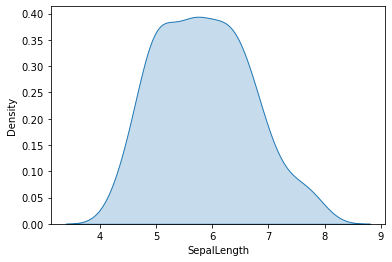

In [166]:
sns.kdeplot(classes.SepalLength,shade=True )

<AxesSubplot:xlabel='SepalWidth', ylabel='Density'>

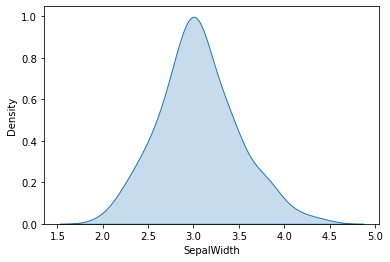

In [167]:
sns.kdeplot(classes.SepalWidth,shade=True )

<AxesSubplot:xlabel='PetalLength', ylabel='Density'>

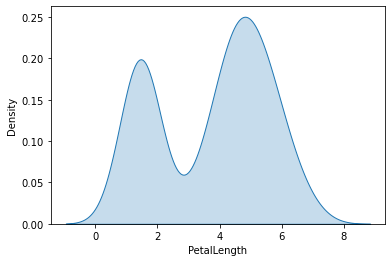

In [169]:
sns.kdeplot(classes.PetalLength,shade=True )

<AxesSubplot:xlabel='PetalWidth', ylabel='Density'>

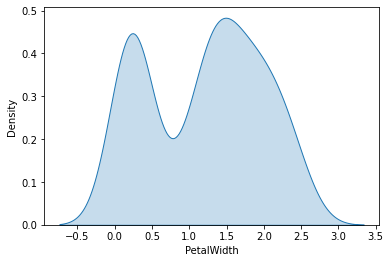

In [170]:
sns.kdeplot(classes.PetalWidth,shade=True )

In [174]:
import random
import numpy as np

X = []

num1 = random.uniform(4,8)
X.append(num1)
num2 = random.uniform(1.5,4.5)
X.append(num2)
num3 = random.uniform(0,8)
X.append(num3)
num4 = random.uniform(0,3)
X.append(num4)
X = np.array(X).reshape(1,4)

X

array([[7.14460968, 3.44163095, 2.49500171, 0.8308436 ]])

In [176]:
calcula_distancia(X,centros)

array([[3.50770289, 2.44821354, 2.44572274]])

In [177]:
print(kmeans.predict(X))

[2]


In [182]:
i = 0
while i < 10:
    X = []
    num1 = random.uniform(4,8)
    X.append(num1)
    num2 = random.uniform(1.5,4.5)
    X.append(num2)
    num3 = random.uniform(0,8)
    X.append(num3)
    num4 = random.uniform(0,3)
    X.append(num4)
    X = np.array(X).reshape(1,4)
    print("Dado", i+1, "gerado: ",X)
    print("Distancia para os centros de: ", calcula_distancia(X,centros))
    print("Classificação prevista: ", kmeans.predict(X))
    print("\n")
    i = i + 1

Dado 1 gerado:  [[6.46745298 3.44299167 3.68588688 2.97110796]]
Distancia para os centros de:  [[2.30669978 1.91481929 3.80924777]]
Classificação prevista:  [1]


Dado 2 gerado:  [[4.23877171 4.11637473 0.61438816 0.16793199]]
Distancia para os centros de:  [[6.14988354 4.53002037 1.34312812]]
Classificação prevista:  [2]


Dado 3 gerado:  [[6.25168379 1.72728228 1.02341815 2.24307515]]
Distancia para os centros de:  [[4.9463502  3.63012313 2.93268962]]
Classificação prevista:  [2]


Dado 4 gerado:  [[7.29312858 1.92201577 6.75641456 0.52476591]]
Distancia para os centros de:  [[2.22317995 3.0047985  5.96300322]]
Classificação prevista:  [0]


Dado 5 gerado:  [[4.18236106 2.7742657  6.49164591 0.58811305]]
Distancia para os centros de:  [[3.15703499 2.84144616 5.14668943]]
Classificação prevista:  [1]


Dado 6 gerado:  [[6.22175678 2.09258876 5.62413794 0.47932529]]
Distancia para os centros de:  [[1.97604404 1.71990455 4.53838134]]
Classificação prevista:  [1]


Dado 7 gerado:  [[5.02